## Observations and Insights 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
study_results_df = study_results
mouse_metadata_df = mouse_metadata
# Display the data table for preview
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Checking the number of mice.
len(merge_df["Mouse ID"].unique())
merge_df.isnull

<bound method DataFrame.isnull of      Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.82589

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
for row_i in study_results_df["Mouse ID"].unique():
    i_df = study_results_df.loc[study_results_df["Mouse ID"] == row_i,:]
    for row_j in i_df["Timepoint"].unique():
        j_df = i_df.loc[i_df["Timepoint"] == row_j,:]
        if len(j_df) > 1:
            print(j_df)
        
    


    Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
107     g989          0                45.0                 0
137     g989          0                45.0                 0
    Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
329     g989          5           48.786801                 0
360     g989          5           47.570392                 0
    Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
620     g989         10           51.745156                 0
681     g989         10           49.880528                 0
    Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
815     g989         15           51.325852                 1
869     g989         15           53.442020                 0
     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
950      g989         20           55.326122                 1
1111     g989         20           54.657650                 1


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 

len(study_results)

1893

In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_results_no_dupes_df = study_results_df.drop_duplicates(subset=['Mouse ID','Timepoint'])
len(study_results_no_dupes_df)

1888

In [8]:
# Checking the number of mice in the clean DataFrame.
merge_df = pd.merge(mouse_metadata, study_results_no_dupes_df, on="Mouse ID")
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1883,z969,Naftisol,Male,9,30,25,63.145652,2
1884,z969,Naftisol,Male,9,30,30,65.841013,3
1885,z969,Naftisol,Male,9,30,35,69.176246,4
1886,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
merge_df["Tumor Volume (mm3)"].describe()
merge_df["Tumor Volume (mm3)"].mean()
merge_df["Tumor Volume (mm3)"].median()
merge_df["Tumor Volume (mm3)"].var()
merge_df["Tumor Volume (mm3)"].std()
merge_df["Tumor Volume (mm3)"].sem()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
drug_group = merge_df.groupby(["Drug Regimen"])
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drug_group_mean_df = drug_group["Tumor Volume (mm3)"].mean()
drug_group_median_df = drug_group["Tumor Volume (mm3)"].median()
drug_group_var_df = drug_group["Tumor Volume (mm3)"].var()
drug_group_std_df = drug_group["Tumor Volume (mm3)"].std()
drug_group_sem_df = drug_group["Tumor Volume (mm3)"].sem()
# Assemble the resulting series into a single summary dataframe.
drug_group_comparison_df = drug_group_mean_df
for x in [drug_group_median_df, drug_group_var_df, drug_group_std_df, drug_group_sem_df]:
    drug_group_comparison_df = pd.merge(drug_group_comparison_df, x, on="Drug Regimen")
drug_group_comparison_df

,Tumor Volume (mm3)_x,Tumor Volume (mm3)_y,Tumor Volume (mm3)_x,Tumor Volume (mm3)_y,Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
merge_df
# Using the aggregation method, produce the same summary statistics in a single line


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1883,z969,Naftisol,Male,9,30,25,63.145652,2
1884,z969,Naftisol,Male,9,30,30,65.841013,3
1885,z969,Naftisol,Male,9,30,35,69.176246,4
1886,z969,Naftisol,Male,9,30,40,70.314904,4


## Bar and Pie Charts

In [11]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
mice_unique_df = merge_df[["Mouse ID","Drug Regimen"]]
mice_unique_df = mice_unique_df.drop_duplicates(subset=['Mouse ID','Drug Regimen'])
drug_group = mice_unique_df.groupby(["Drug Regimen"])
mice_grouped_by_drugs_df = drug_group["Mouse ID"].count()
mice_grouped_by_drugs_df
print(mice_grouped_by_drugs_df[len(mice_grouped_by_drugs_df)-1])

25


(-0.75, 9.75)

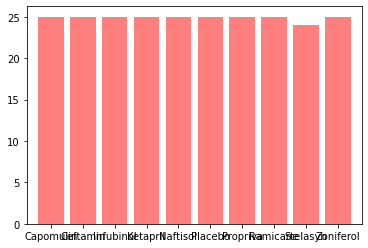

In [12]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
mice = []
for row in mice_grouped_by_drugs_df:
    mice.append(row)
x_axis = np.arange(len(mice_grouped_by_drugs_df))
plt.bar(x_axis, mice, color='r', alpha=0.5, align="center")
tick_locations = x_axis
plt.xticks(tick_locations, mice_grouped_by_drugs_df.index)
plt.xlim(-0.75, len(x_axis)-0.25)

([<matplotlib.patches.Wedge at 0x1fd57bd66a0>,
 [Text(-0.7771287477781476, -0.9143691319028482, 'Female'),
  Text(0.7123680187966355, 0.8381717042442776, 'Male')],
 [Text(-0.4533251028705861, -0.5333819936099948, '49.8%'),
  Text(0.38856437388907383, 0.4571845659514241, '50.2%')])

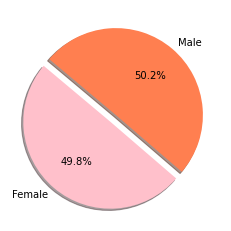

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_unique_df = merge_df.drop_duplicates(subset=['Mouse ID','Sex'])
gender_group = mice_unique_df.groupby(["Sex"])
mice_grouped_by_gender_df = gender_group["Mouse ID"].count()
mice_grouped_by_gender_df
labels = mice_grouped_by_gender_df.index
mice = []
for row in mice_grouped_by_gender_df:
    mice.append(row)
colors = ["pink", "coral"]
explode = (0.1, 0)
plt.pie(mice, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
merge_df
#merge_df = merge_df.drop_duplicates(subset=['Mouse ID','Drug Regimen'])

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1883,z969,Naftisol,Male,9,30,25,63.145652,2
1884,z969,Naftisol,Male,9,30,30,65.841013,3
1885,z969,Naftisol,Male,9,30,35,69.176246,4
1886,z969,Naftisol,Male,9,30,40,70.314904,4


## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
unique_mice_df = merge_df.drop_duplicates(subset=['Mouse ID','Drug Regimen'])
four_treatments_df = unique_mice_df.loc[(unique_mice_df["Drug Regimen"] == "Capomulin") | (unique_mice_df["Drug Regimen"] == "Ramicane") | (unique_mice_df["Drug Regimen"] == "Infubinol") | (unique_mice_df["Drug Regimen"] == "Ceftamin"),"Mouse ID"]
# Start by getting the last (greatest) timepoint for each mouse
four_treatments_a_df = pd.DataFrame(columns=["Mouse ID"])
four_treatments_a_df = pd.DataFrame(four_treatments_df)
four_treatments_a_df
mice = []
time_points = []
max_timepoints_df = pd.DataFrame(columns=["Mouse ID", "Timepoint"])
for row in four_treatments_a_df["Mouse ID"]:
    df = merge_df.loc[merge_df["Mouse ID"] == row, "Timepoint"].max()
    mice.append(row)
    time_points.append(df)
raw_data = {"Mouse ID": mice, "Last Timepoint": df}
max_timepoints_df = pd.DataFrame(raw_data)    
max_timepoints_df
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_last_timepoint_df = pd.merge(merge_df, max_timepoints_df, on="Mouse ID").drop_duplicates(subset = ['Mouse ID','Tumor Volume (mm3)','Last Timepoint'])
tumor_last_df = tumor_last_timepoint_df.loc[tumor_last_timepoint_df["Timepoint"] == tumor_last_timepoint_df["Last Timepoint"], :] 
print(tumor_last_df["Drug Regimen"])

9       Ramicane
19     Capomulin
29     Capomulin
39     Capomulin
49      Ramicane
         ...    
773     Ceftamin
783    Infubinol
793     Ceftamin
803     Ceftamin
813    Infubinol
Name: Drug Regimen, Length: 63, dtype: object


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []
for treatment in treatments:
    tumor_vol.append(tumor_last_df.loc[tumor_last_df["Drug Regimen"] == treatment,"Tumor Volume (mm3)"])
tumor_vol
        
        

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for i in range(4):
    quartiles = tumor_vol[i].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f"The lower quartile of final tumor volume for mice treated with {treatments[i]} is: {lowerq}")
    print(f"The upper quartile of final tumor volume for mice treated with {treatments[i]} is: {upperq}")
    print(f"The interquartile range of final tumor volume for mice treated with {treatments[i]} is: {iqr}")
    print(f"The the median final tumor volume of {treatments[i]} treatments is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    print("")
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

The lower quartile of final tumor volume for mice treated with Capomulin is: 32.37735684
The upper quartile of final tumor volume for mice treated with Capomulin is: 40.1592203
The interquartile range of final tumor volume for mice treated with Capomulin is: 7.781863460000004
The the median final tumor volume of Capomulin treatments is: 37.31184577 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.

The lower quartile of final tumor volume for mice treated with Ramicane is: 30.981175224999998
The upper quartile of final tumor volume for mice treated with Ramicane is: 38.508305307499995
The interquartile range of final tumor volume for mice treated with Ramicane is: 7.527130082499998
The the median final tumor volume of Ramicane treatments is: 34.848627300000004 
Values below 19.690480101250003 could be outliers.
Values above 49.79900043124999 could be outliers.

The lower quartile of final tumor volume for mice treated with Infubinol is: 62.7

[Text(1, 0, 'Capomulin'),
 Text(2, 0, 'Ramicane'),
 Text(3, 0, 'Infubinol'),
 Text(4, 0, 'Ceftamin')]

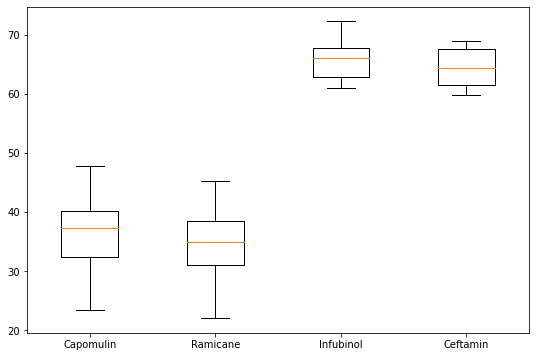

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(tumor_vol)

# Save the figure
fig.savefig('fig1.png', bbox_inches='tight')

ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()


ax.set_xticklabels(treatments)

## Line and Scatter Plots

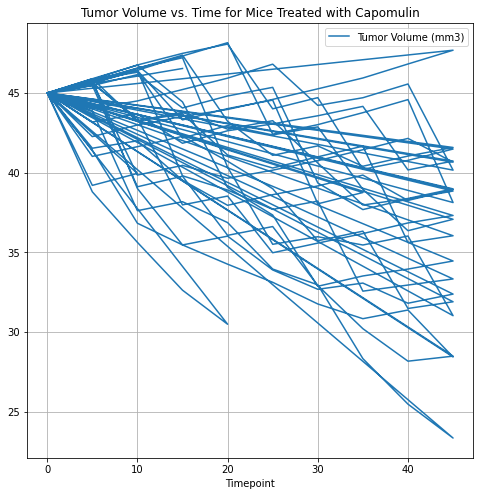

In [18]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
unique_df = merge_df.drop_duplicates(subset = ["Drug Regimen", "Mouse ID","Tumor Volume (mm3)", "Timepoint"])
df = unique_df.loc[unique_df["Drug Regimen"] == "Capomulin", :]
test = df.plot(kind="line", x="Timepoint", y="Tumor Volume (mm3)", grid=True, figsize=(8,8),
              title="Tumor Volume vs. Time for Mice Treated with Capomulin")
plt.show()

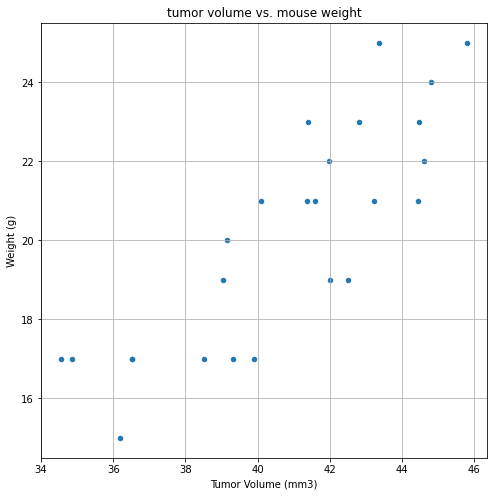

In [23]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
unique_df = merge_df.drop_duplicates(subset = ["Drug Regimen", "Weight (g)", "Mouse ID", "Tumor Volume (mm3)"])
df = merge_df.loc[merge_df["Drug Regimen"] == "Capomulin", :]

df = df.groupby("Mouse ID").agg({"Weight (g)" : "mean","Tumor Volume (mm3)" : "mean"})

test = df.plot(kind="scatter", x="Tumor Volume (mm3)", y="Weight (g)", grid=True, figsize=(8,8),
              title="tumor volume vs. mouse weight")
plt.show()



## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 

# for mouse weight and average tumor volume for the Capomulin regimen
